In [1]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import string
df = pd.read_excel("hate1.xlsx", header = None,encoding='latin-1',)
df.rename(columns={0:'post', 1:'label'}, inplace=True)
print(df.head(10))
my_labels = ['hate', 'normal']

                                                post   label
0  Mumicha minster Ethiopian jawar Mohammed 2020 ...  normal
1  Rabbiin dhabamaa si haa godhuu malee xalaatni ...    hate
2  Kiyaa Ajawaa kana dhagefachu jibee wly  Walaga...    hate
3  dubartoonni Oromoo dress qofa jijjiiradhaa paa...  normal
4  Ani omn koo dhabe midia  amara jelaa ilala tur...  normal
5  Ati ethiopia  bulchuu  miti jimmaa  kantibaa  ...    hate
6  Kaabineen comment kun dhageeffachuuf seentan m...  normal
7  Yoo  Abiyin Aradhaa wanaa Jawaar Qequu Asiratt...    hate
8  Ijoolleen Amrifaa hin benee muctii harkaa harg...  normal
9  Utuu amara jelaa fiiguu jarii dibanii sii nyac...  normal


In [3]:
import nltk
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('oromiffa')
def clean_text():
    #convert all data into lower letter
    df["post"] = df["post"].apply(lambda x: str(x).lower())
    #remove punctuation
    df["post"] = df["post"].apply(lambda tweet: tweet.translate(str.maketrans('', '', string.punctuation)))
    #remove number number and symbols
    df["post"] = df["post"].apply(lambda tweet: tweet.translate(str.maketrans('', '', "0123456789❤♀️♥⚽️《")) )
    #remove stop words
    df["post"] = df["post"].str.split(' ').apply(lambda tweet: ' '.join(k for k in tweet if k not in STOPWORDS))
clean_text()
print(df.head(10))


                                                post   label
0  mumicha minster ethiopian jawar mohammed  insh...  normal
1  rabbiin dhabamaa si haa godhuu xalaatni tokko ...    hate
2  kiyaa ajawaa dhagefachu jibee wly  walagaatii ...    hate
3  dubartoonni oromoo dress qofa jijjiiradhaa paa...  normal
4  omn dhabe midia  amara jelaa ilala turee namit...  normal
5  ethiopia  bulchuu  miti jimmaa  kantibaa  tate...    hate
6  kaabineen comment dhageeffachuuf seentan moo w...  normal
7   abiyin aradhaa wanaa jawaar qequu asiratti du...    hate
8  ijoolleen amrifaa hin benee muctii harkaa harg...  normal
9  amara jelaa fiiguu jarii dibanii sii nyacha ji...  normal


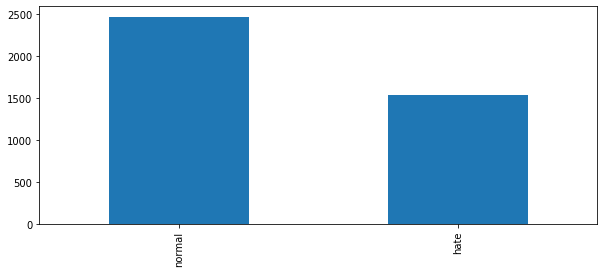

In [4]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

([<matplotlib.patches.Wedge at 0x201117930c8>,
 [Text(-0.3928600785795818, 1.0274536284711078, 'normal'),
  Text(0.3928599823824287, -1.0274536652533184, 'hate')])

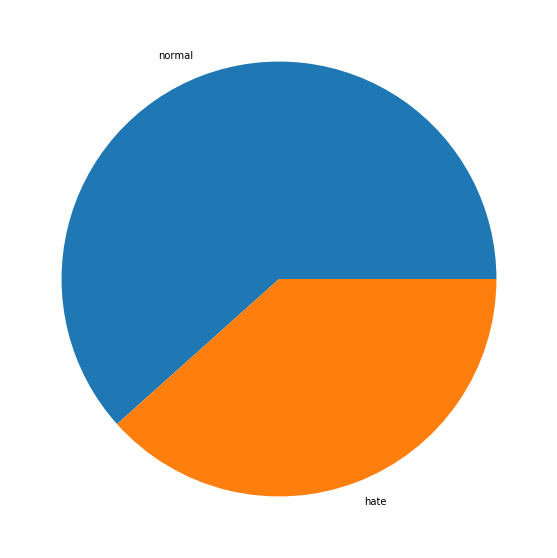

In [5]:
#mat plot our data set labeling
plt.figure(figsize=(20,10))
labe=["normal","hate"]
#Show the histogram
plt.pie(df.label.value_counts(),labels=labe)

In [6]:
from sklearn.model_selection import train_test_split

# Data splitting 70% for train and 30% for test
X = df.post
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

print ('Total   Post count:', len(df))
print ('Normal  post count:', len(df[df.label == "normal"]))
print ('Hateful post count:', len(df[df.label == "hate"]), '\n')
print ('Total post count in trainin sampple:', len(X_train))
print ('Total post count in test sample:    ', len(X_test))
print ('Normal  post count in X_train:', X_train[y_train == "normal"].count())
print ('Hateful post count in X_train:', X_train[y_train == "hate"].count())
print ('Normal  post count in X_test: ', X_test[y_test == "normal"].count())
print ('Hateful post count in X_test: ', X_test[y_test == "hate"].count())

Total   Post count: 4000
Normal  post count: 2465
Hateful post count: 1535 

Total post count in trainin sampple: 2800
Total post count in test sample:     1200
Normal  post count in X_train: 1714
Hateful post count in X_train: 1086
Normal  post count in X_test:  751
Hateful post count in X_test:  449


In [7]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
filename = 'nb.sav'
pickle.dump(nb, open(filename, 'wb'))

In [8]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
nbaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.76
              precision    recall  f1-score   support

        hate       0.82      0.46      0.59       449
      normal       0.74      0.94      0.83       751

    accuracy                           0.76      1200
   macro avg       0.78      0.70      0.71      1200
weighted avg       0.77      0.76      0.74      1200

Wall time: 70 ms


In [9]:
# Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=10, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)
filename = 'svm.sav'
pickle.dump(sgd, open(filename, 'wb'))
 

In [10]:
%%time
from sklearn.metrics import classification_report
y_pred = sgd.predict(X_test)
svmaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.73
              precision    recall  f1-score   support

        hate       0.82      0.36      0.50       449
      normal       0.71      0.95      0.82       751

    accuracy                           0.73      1200
   macro avg       0.77      0.65      0.66      1200
weighted avg       0.75      0.73      0.70      1200

Wall time: 83 ms


In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)
filename = 'lr.sav'
pickle.dump(logreg, open(filename, 'wb'))

C:\Users\Fekadu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
%%time
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
logregaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.75
              precision    recall  f1-score   support

        hate       0.67      0.67      0.67       449
      normal       0.80      0.80      0.80       751

    accuracy                           0.75      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.75      0.75      0.75      1200

Wall time: 78 ms


In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=3)),
               ])
knn.fit(X_train, y_train)
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))
y_pred = knn.predict(X_test)
knnaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.6925
              precision    recall  f1-score   support

        hate       0.74      0.27      0.40       449
      normal       0.68      0.94      0.79       751

    accuracy                           0.69      1200
   macro avg       0.71      0.61      0.60      1200
weighted avg       0.71      0.69      0.65      1200



In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
dt.fit(X_train, y_train)
filename = 'dt.sav'
pickle.dump(dt, open(filename, 'wb'))
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
dtaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.7391666666666666
              precision    recall  f1-score   support

        hate       0.69      0.54      0.61       449
      normal       0.76      0.86      0.80       751

    accuracy                           0.74      1200
   macro avg       0.73      0.70      0.71      1200
weighted avg       0.73      0.74      0.73      1200



In [15]:
# Random Forest  Classifier
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
rf.fit(X_train, y_train)
filename = 'rf.sav'
pickle.dump(rf, open(filename, 'wb'))
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
rfaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

C:\Users\Fekadu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.7533333333333333
              precision    recall  f1-score   support

        hate       0.72      0.56      0.63       449
      normal       0.77      0.87      0.82       751

    accuracy                           0.75      1200
   macro avg       0.74      0.71      0.72      1200
weighted avg       0.75      0.75      0.75      1200



In [16]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', GradientBoostingClassifier()),
              ])
gb.fit(X_train, y_train)
filename = 'gb.sav'
pickle.dump(gb, open(filename, 'wb'))
from sklearn.metrics import classification_report
y_pred = gb.predict(X_test)
gbaccuracy=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.7233333333333334
              precision    recall  f1-score   support

        hate       0.81      0.34      0.48       449
      normal       0.71      0.95      0.81       751

    accuracy                           0.72      1200
   macro avg       0.76      0.65      0.64      1200
weighted avg       0.75      0.72      0.69      1200



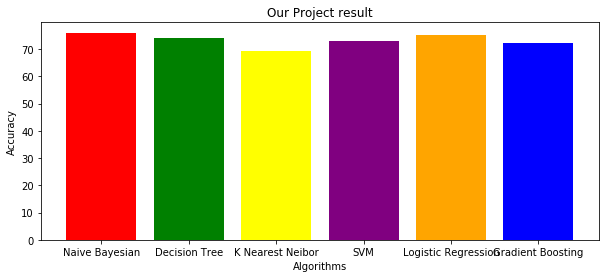

In [17]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5,6] 
height = [nbaccuracy*100, dtaccuracy*100, knnaccuracy*100, svmaccuracy*100, logregaccuracy*100,gbaccuracy*100] 
plt.figure(figsize=(10,4)) 
# labels for bars 
tick_label = ['Naive Bayesian', 'Decision Tree', 'K Nearest Neibor', 'SVM', 'Logistic Regression','Gradient Boosting'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','yellow','purple','orange','blue']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Our Project result') 
 
# function to show the plot 
plt.show() 